<a href="https://colab.research.google.com/github/IDE21/AdvanceML/blob/main/Parkinson's_Disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, learning_curve, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

In [22]:
file_path = "/content/dataset.csv"
dataset = pd.read_csv(file_path)

# Drop irrelevant columns
dataset_cleaned = dataset.drop(columns=["name"])

# Handle missing values
imputer = SimpleImputer(strategy="mean")
dataset_imputed = pd.DataFrame(imputer.fit_transform(dataset_cleaned), columns=dataset_cleaned.columns)

# Ensure the target column is categorical (convert to integers if necessary)
dataset_imputed["status"] = dataset_imputed["status"].astype(int)

# Split data into features (X) and target (y)
X = dataset_imputed.drop(columns=["status"])
y = dataset_imputed["status"]

# Scale features
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [23]:
# Function to plot learning curves
def plot_learning_curve(model, X, y, model_name):
    train_sizes, train_scores, validation_scores = learning_curve(
        model, X, y, cv=5, scoring="accuracy", n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
    )
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    val_mean = np.mean(validation_scores, axis=1)
    val_std = np.std(validation_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_mean, label="Training Score", color="blue", linewidth=2)
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="blue", alpha=0.2)
    plt.plot(train_sizes, val_mean, label="Validation Score", color="green", linewidth=2)
    plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, color="green", alpha=0.2)

    plt.title(f"Learning Curve ({model_name})")
    plt.xlabel("Training Size")
    plt.ylabel("Accuracy")
    plt.legend(loc="best")
    plt.grid()
    plt.show()

# Function to plot confusion matrix
def plot_confusion_matrix(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    conf_matrix = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f"{model_name} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

               Model  Training Accuracy  Testing Accuracy  Validation Accuracy
0      Decision Tree           0.995816          0.974895             0.966536
1      Random Forest           1.000000          0.987448             0.976980
2  Gradient Boosting           1.000000          0.983264             0.976985


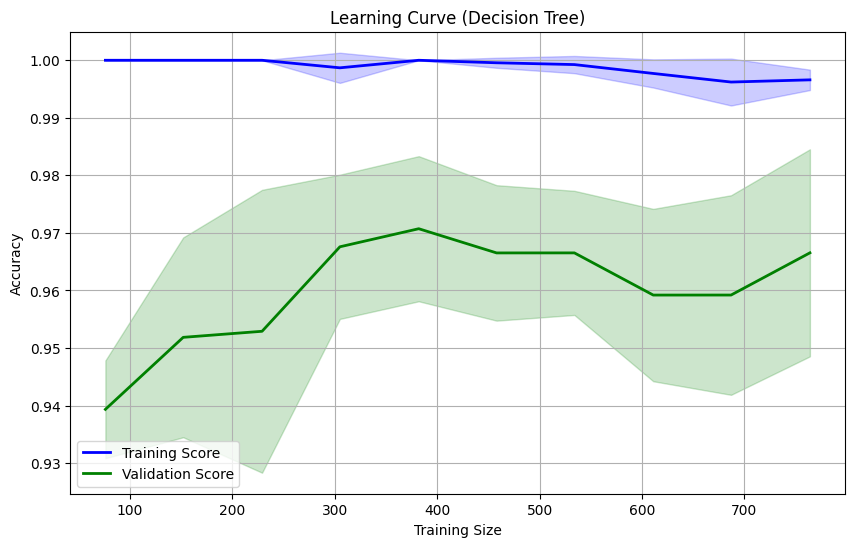

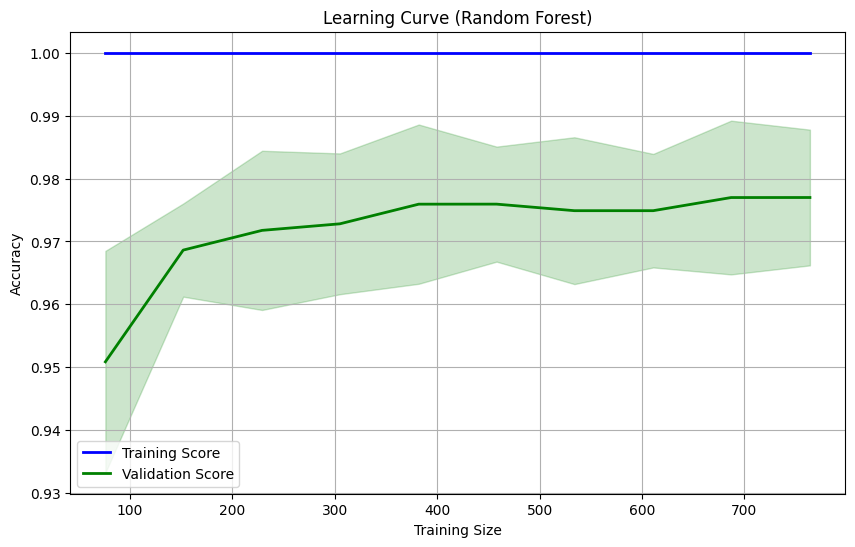

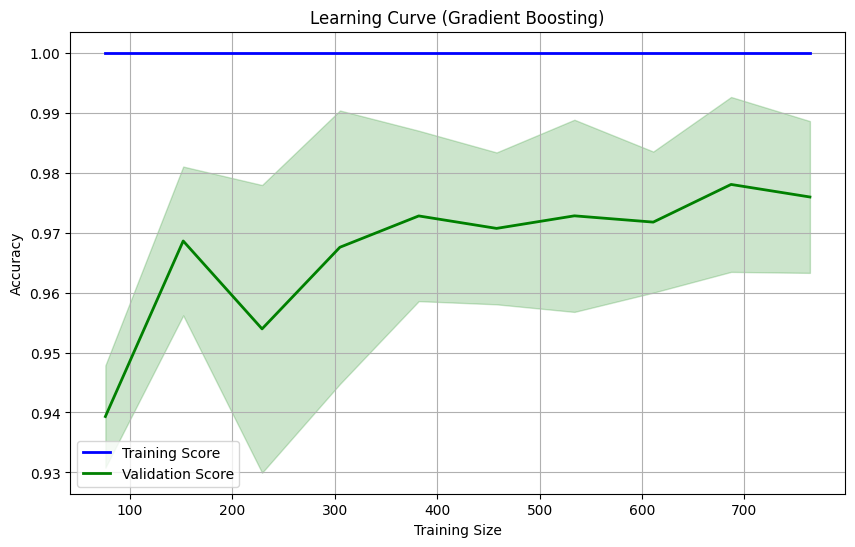

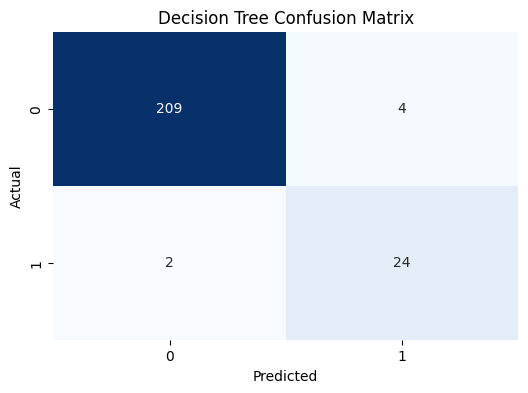

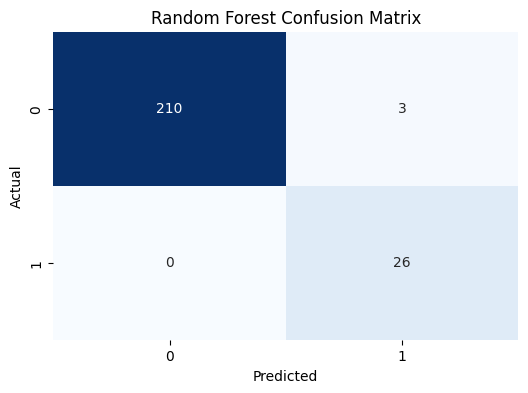

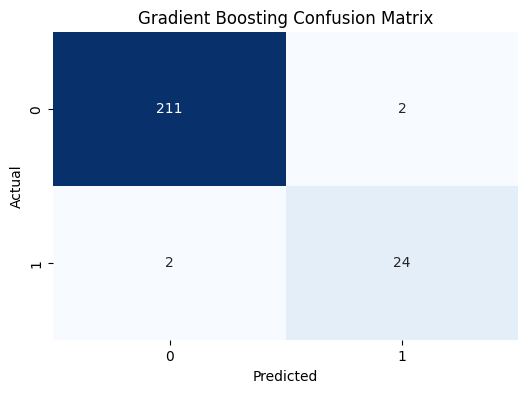

In [24]:
# Initialize models with anti-overfitting parameters
dt_model = DecisionTreeClassifier(max_depth=5, random_state=42)
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, max_features="sqrt", random_state=42)
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Fit models
dt_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
gb_model.fit(X_train, y_train)

# Compute training accuracy
dt_train_acc = accuracy_score(y_train, dt_model.predict(X_train))
rf_train_acc = accuracy_score(y_train, rf_model.predict(X_train))
gb_train_acc = accuracy_score(y_train, gb_model.predict(X_train))

# Compute testing accuracy
dt_test_acc = accuracy_score(y_test, dt_model.predict(X_test))
rf_test_acc = accuracy_score(y_test, rf_model.predict(X_test))
gb_test_acc = accuracy_score(y_test, gb_model.predict(X_test))

# Compute validation accuracy using cross-validation
dt_val_acc = np.mean(cross_val_score(dt_model, X_train, y_train, cv=5, scoring="accuracy"))
rf_val_acc = np.mean(cross_val_score(rf_model, X_train, y_train, cv=5, scoring="accuracy"))
gb_val_acc = np.mean(cross_val_score(gb_model, X_train, y_train, cv=5, scoring="accuracy"))

# Display results
results = pd.DataFrame({
    "Model": ["Decision Tree", "Random Forest", "Gradient Boosting"],
    "Training Accuracy": [dt_train_acc, rf_train_acc, gb_train_acc],
    "Testing Accuracy": [dt_test_acc, rf_test_acc, gb_test_acc],
    "Validation Accuracy": [dt_val_acc, rf_val_acc, gb_val_acc]
})

print(results)

# Visualize learning curves
plot_learning_curve(dt_model, X_train, y_train, "Decision Tree")
plot_learning_curve(rf_model, X_train, y_train, "Random Forest")
plot_learning_curve(gb_model, X_train, y_train, "Gradient Boosting")

# Visualize confusion matrices
plot_confusion_matrix(dt_model, X_test, y_test, "Decision Tree")
plot_confusion_matrix(rf_model, X_test, y_test, "Random Forest")
plot_confusion_matrix(gb_model, X_test, y_test, "Gradient Boosting")

<ipython-input-25-6828f7e6d393>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=val_scores, palette="viridis")


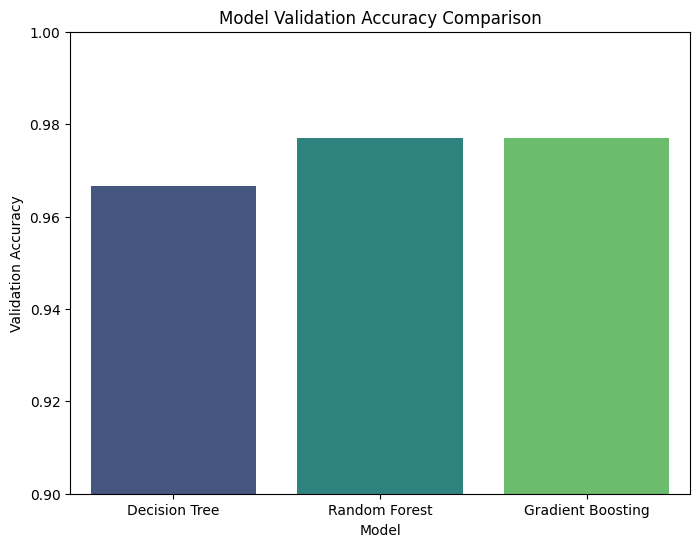

In [25]:
# Validation accuracy bar plot
models = ["Decision Tree", "Random Forest", "Gradient Boosting"]
val_scores = [dt_val_acc, rf_val_acc, gb_val_acc]

plt.figure(figsize=(8, 6))
sns.barplot(x=models, y=val_scores, palette="viridis")
plt.title("Model Validation Accuracy Comparison")
plt.ylabel("Validation Accuracy")
plt.xlabel("Model")
plt.ylim(0.9, 1.0)
plt.show()